In [1]:
import numpy as np
import pandas as pd 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import itertools
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [7]:
# Load dataset
data = pd.read_csv('complete_fiscal_data.csv')

# Filter training (2019) and test (2022) data
train_data = data[data['year'] == 2019]
test_data = data[data['year'] == 2022]

# Select predictor columns starting from column L
predictor_cols = train_data.columns[11:]
outcome_cols = ['outperform_math', 'outperform_reading']

# Create training and test sets
X_train = train_data[predictor_cols]
y_train_math = train_data['outperform_math']
y_train_reading = train_data['outperform_reading']

X_test = test_data[predictor_cols]
y_test_math = test_data['outperform_math']
y_test_reading = test_data['outperform_reading']

## SVM

In [8]:
# Define SVM model
svm_model = SVC()

# Define parameter grid for Grid Search
param_grid = {
    'C': [0.1, 0.35, 0.45, 0.55, 0.65, 0.75, 1],     # Regularization parameter
    'gamma': ['scale', 'auto'], # Kernel coefficient
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'] # Kernel type
}

In [9]:
# Scale the train data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Scale the test data
X_test_scaled = scaler.transform(X_test)

In [10]:
# Perform Grid Search with LOOCV for outperform_math
loocv = LeaveOneOut()
grid_search_math = GridSearchCV(svm_model, param_grid, cv=loocv, scoring='accuracy')
grid_search_math.fit(X_train_scaled, y_train_math)

# Get best parameters and best score for outperform_math
best_params_math = grid_search_math.best_params_
best_score_math = grid_search_math.best_score_

print(f'Best Parameters for outperform_math: {best_params_math}')
print(f'Best Accuracy Score for outperform_math: {best_score_math:.4f}')

Best Parameters for outperform_math: {'C': 0.45, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy Score for outperform_math: 0.5882


In [11]:
# Perform Grid Search with LOOCV for outperform_reading
grid_search_reading = GridSearchCV(svm_model, param_grid, cv=loocv, scoring='accuracy')
grid_search_reading.fit(X_train_scaled, y_train_reading)

# Get best parameters and best score for outperform_reading
best_params_reading = grid_search_reading.best_params_
best_score_reading = grid_search_reading.best_score_

print(f'Best Parameters for outperform_reading: {best_params_reading}')
print(f'Best Accuracy Score for outperform_reading: {best_score_reading:.4f}')

Best Parameters for outperform_reading: {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}
Best Accuracy Score for outperform_reading: 0.6275


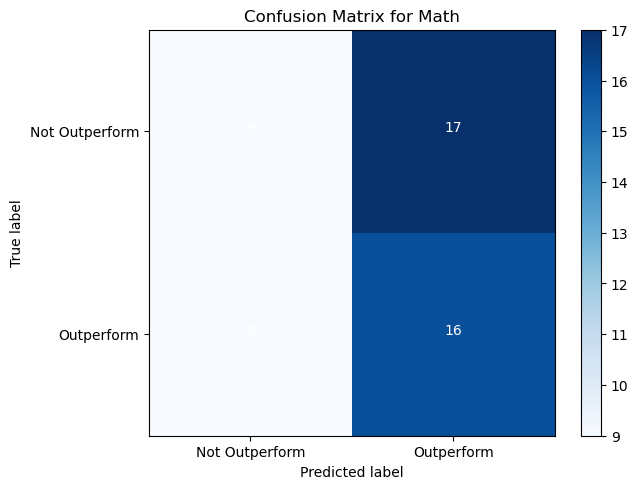

In [12]:
# Train SVM model with best parameters for outperform_math
final_svm_math = SVC(**best_params_math)
final_svm_math.fit(X_train_scaled, y_train_math)

# Predict on test set for outperform_math
y_pred_math = final_svm_math.predict(X_test_scaled) >= 0.5

# Compute confusion matrix for outperform_math
conf_matrix_math = confusion_matrix(y_test_math, y_pred_math)

# Draw confusion matrix for outperform_math
plt.imshow(conf_matrix_math, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Math')
plt.colorbar()

# Add axis labels
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Not Outperform', 'Outperform'])
plt.yticks(tick_marks, ['Not Outperform', 'Outperform'])

# Add annotations
thresh = conf_matrix_math.max() / 2.
for i, j in itertools.product(range(conf_matrix_math.shape[0]), range(conf_matrix_math.shape[1])):
    plt.text(j, i, format(conf_matrix_math[i, j], 'd'), horizontalalignment="center",
             color="white" if conf_matrix_math[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

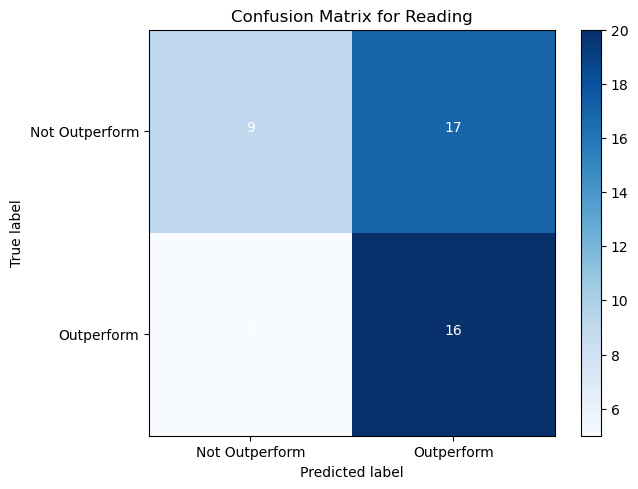

In [13]:
# Train SVM model with best parameters for outperform_reading
final_svm_reading = SVC(**best_params_reading)
final_svm_reading.fit(X_train_scaled, y_train_reading)

# Predict on test set for outperform_reading
y_pred_reading = final_svm_reading.predict(X_test_scaled)  >= 0.5

# Compute confusion matrix for outperform_reading
conf_matrix_reading = confusion_matrix(y_test_reading, y_pred_reading)

# Draw confusion matrix for outperform_reading
plt.imshow(conf_matrix_reading, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Reading')
plt.colorbar()

# Add axis labels
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Not Outperform', 'Outperform'])
plt.yticks(tick_marks, ['Not Outperform', 'Outperform'])

# Add annotations
thresh = conf_matrix_math.max() / 2.
for i, j in itertools.product(range(conf_matrix_math.shape[0]), range(conf_matrix_math.shape[1])):
    plt.text(j, i, format(conf_matrix_math[i, j], 'd'), horizontalalignment="center",
             color="white" if conf_matrix_math[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## LDA

In [25]:
# Define LDA model
lda_model = LinearDiscriminantAnalysis()

# Train LDA model on training data for outperform_math
lda_model.fit(X_train_scaled, y_train_math)

# Predict on test set for outperform_math
y_pred_math = (lda_model.predict(X_test_scaled) >= 0.5)

# Compute accuracy score for outperform_math
accuracy_math = accuracy_score(y_test_math, y_pred_math)
print(f'Accuracy for outperform_math on test set using LDA: {accuracy_math:.4f}')

Accuracy for outperform_math on test set using LDA: 0.4510


In [24]:
# Train LDA model on training data for outperform_reading
lda_model.fit(X_train_scaled, y_train_reading)

# Predict on test set for outperform_reading
y_pred_reading = (lda_model.predict(X_test_scaled) >= 0.5)

# Compute accuracy score for outperform_reading
accuracy_reading = accuracy_score(y_test_reading, y_pred_reading)
print(f'Accuracy for outperform_reading on test set using LDA: {accuracy_reading:.4f}')

Accuracy for outperform_reading on test set using LDA: 0.6863


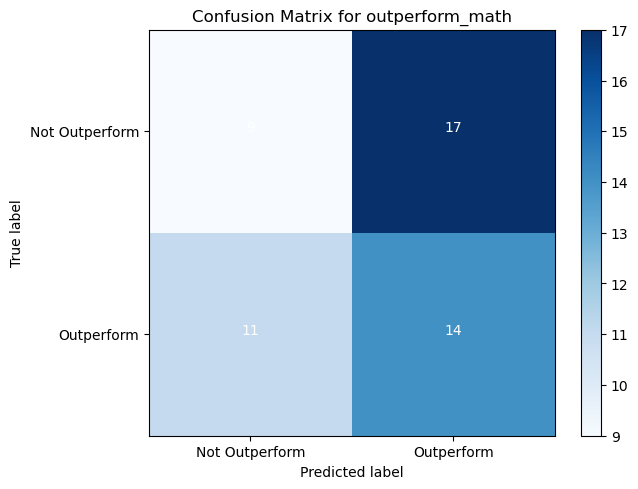

In [16]:
# Compute confusion matrix for outperform_math
conf_matrix_math = confusion_matrix(y_test_math, y_pred_math)

# Visualize confusion matrix for outperform_math
plt.imshow(conf_matrix_math, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for outperform_math')
plt.colorbar()

# Add axis labels
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Not Outperform', 'Outperform'])
plt.yticks(tick_marks, ['Not Outperform', 'Outperform'])

# Add annotations
thresh = conf_matrix_math.max() / 2.
for i, j in itertools.product(range(conf_matrix_math.shape[0]), range(conf_matrix_math.shape[1])):
    plt.text(j, i, format(conf_matrix_math[i, j], 'd'), horizontalalignment="center",
             color="white" if conf_matrix_math[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

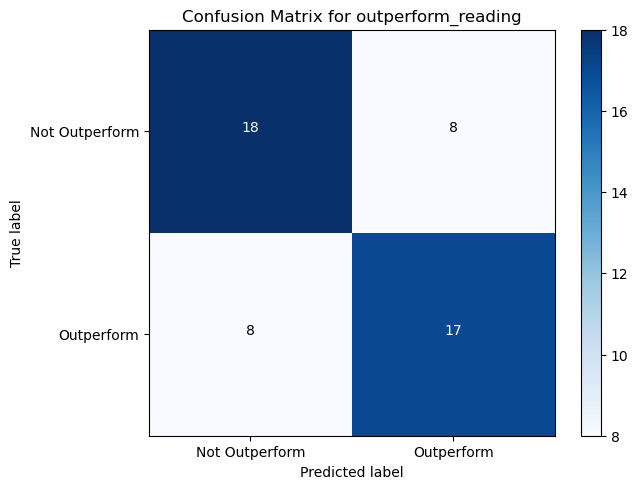

In [17]:
# Compute confusion matrix for outperform_reading
conf_matrix_reading = confusion_matrix(y_test_reading, y_pred_reading)

# Visualize confusion matrix for outperform_reading
plt.imshow(conf_matrix_reading, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for outperform_reading')
plt.colorbar()

# Add axis labels
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Not Outperform', 'Outperform'])
plt.yticks(tick_marks, ['Not Outperform', 'Outperform'])

# Add annotations
thresh = conf_matrix_reading.max() / 2.
for i, j in itertools.product(range(conf_matrix_reading.shape[0]), range(conf_matrix_reading.shape[1])):
    plt.text(j, i, format(conf_matrix_reading[i, j], 'd'), horizontalalignment="center",
             color="white" if conf_matrix_reading[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
